In [1]:
import csv
import utm
proc_click = []
raw = []

path = '../calibrate/Log1.csv'
with open(path) as clicks:
    reader = csv.reader(clicks)
    for line in reader:
        if line[0] != 'LORA good':
            # print(line)
            if line[5] == ' 4':
                # breakdown line
                u = utm.from_latlon(float(line[0]), float(line[1]))
                # u = pm.geodetic2ned(float(line[0]), float(line[1]), float(line[2]), origin[0], origin[1], origin[2])
                pt = [u[0], u[1]]
                raw.append([float(line[0]), float(line[1])])
                # print(u)
                proc_click.append(pt)

# print(proc_click)

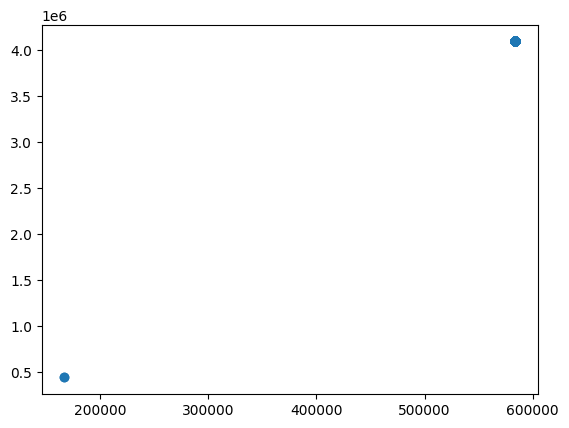

In [2]:
import matplotlib.pyplot as plt

# print(proc_click[1:])
x = list(list(zip(*proc_click))[0])
y = list(list(zip(*proc_click))[1])

# first = 11
# print(x, y)

plt.scatter(x, y)

In [3]:
import numpy as np
from scipy.cluster.vq import kmeans2
ax = np.asarray(proc_click)
ar = np.asarray(raw)
centroid, label = kmeans2(ax, 2, minit='points')
c2, l2 = kmeans2(ar, 2, minit='points')

print(centroid, c2)

[[ 583795.51364432 4090508.1543328 ]
 [ 166818.46925805  439277.29503749]] [[   3.96875       0.        ]
 [  36.95692852 -122.05876661]]


602
[0.00747523 0.01168309]
2
[1.05333429e-07 8.39099023e-08]


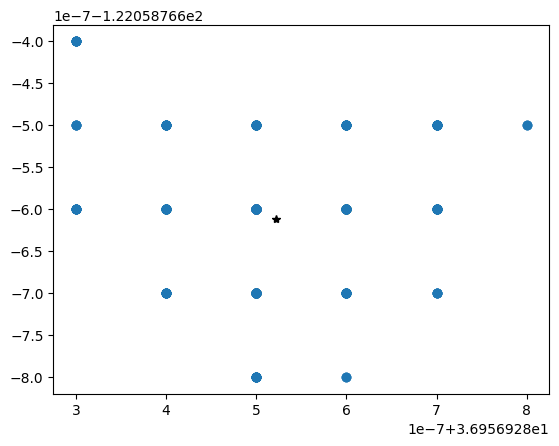

In [11]:
w0 = ax[label == 0]
print(len(w0))
print(np.std(w0, axis=0))
w1 = ax[label == 1]
print(len(w1)) # there are 2 erroneous measurments
# w2 = ar[l2 == 0]
# print(len(w2))
w3 = ar[l2 == 1]
magic_cm = 1e7
print(np.std(w3, axis=0))




# plt.plot(w0[:,0], w0[:, 1], 'o', alpha=0.75, label='cluster 0')
# plt.plot(w1[:,0], w1[:, 1], 'd', alpha=0.75, label='cluster 1')
# plt.plot(w2[:,0], w2[:, 1], 's', alpha=0.75, label='c2 0')
plt.plot(w3[:,0], w3[:, 1], 'o', alpha=0.75, label='c2 1')
# plt.plot(centroid[0,0], centroid[0, 1], 'k*', alpha=1, label='centroids')
plt.plot(c2[1,0], c2[1, 1], 'k*', alpha=1, label='c2')
# plt.axis('equal')
plt.show()
